In [1]:
import numpy as np
import h5py
from tools.tools import *
from matplotlib import pyplot as plt 
import pandas as pd
import random as rand
from scipy.stats import zscore
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from constant import *
import pyeeg

In [2]:
h5_datas = h5py.File("../ml_project_data/h5/X_train.h5/X_train.h5","r")
h5_features = h5py.File("../ml_project_data/h5/X_train.h5/extracted_features.hdf5","r")
labels = pd.read_csv('../ml_project_data/h5/y_train.csv').values[:,1]

In [3]:
X_train, X_test, y_train, y_test = pick_train_test(7000,labels)

In [4]:
list(h5_features.keys())

['eeg_1_ApEn',
 'eeg_1_energy',
 'eeg_1_iqr',
 'eeg_1_kurtosis',
 'eeg_1_max',
 'eeg_1_mean',
 'eeg_1_median',
 'eeg_1_min',
 'eeg_1_min_to_max_distance',
 'eeg_1_skewness',
 'eeg_1_std',
 'eeg_2_ApEn',
 'eeg_2_energy',
 'eeg_2_iqr',
 'eeg_2_kurtosis',
 'eeg_2_max',
 'eeg_2_mean',
 'eeg_2_median',
 'eeg_2_min',
 'eeg_2_min_to_max_distance',
 'eeg_2_skewness',
 'eeg_2_std',
 'eeg_3_ApEn',
 'eeg_3_energy',
 'eeg_3_iqr',
 'eeg_3_kurtosis',
 'eeg_3_max',
 'eeg_3_mean',
 'eeg_3_median',
 'eeg_3_min',
 'eeg_3_min_to_max_distance',
 'eeg_3_skewness',
 'eeg_3_std',
 'eeg_4_ApEn',
 'eeg_4_energy',
 'eeg_4_iqr',
 'eeg_4_kurtosis',
 'eeg_4_max',
 'eeg_4_mean',
 'eeg_4_median',
 'eeg_4_min',
 'eeg_4_min_to_max_distance',
 'eeg_4_skewness',
 'eeg_4_std',
 'eeg_5_ApEn',
 'eeg_5_energy',
 'eeg_5_iqr',
 'eeg_5_kurtosis',
 'eeg_5_max',
 'eeg_5_mean',
 'eeg_5_median',
 'eeg_5_min',
 'eeg_5_min_to_max_distance',
 'eeg_5_skewness',
 'eeg_5_std',
 'eeg_6_ApEn',
 'eeg_6_energy',
 'eeg_6_iqr',
 'eeg_6_kurtos

In [5]:
feature_train_allan =record_features(X_train,h5_features)
feature_test_allan =record_features(X_test,h5_features)


In [6]:
eeg_train = np.transpose(record_eeg(X_train,h5_datas),(1,0,2))
eeg_test = np.transpose(record_eeg(X_test,h5_datas),(1,0,2))

In [7]:
pfd_train = treat_samples(eeg_train, pyeeg.pfd).T
pfd_test = treat_samples(eeg_test, pyeeg.pfd).T

In [8]:
X_train_pfd = np.concatenate((feature_train_allan,pfd_train),axis=1)
X_test_pfd = np.concatenate((feature_test_allan,pfd_test),axis=1)

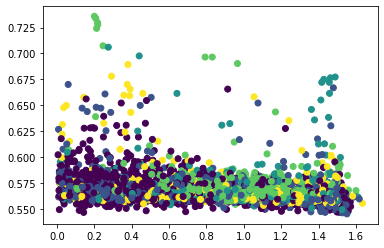

In [9]:
plt.scatter(X_train_pfd[:,0],X_train_pfd[:,-1],c=y_train)

# Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train_pfd, y_train)

RandomForestClassifier(n_estimators=1000)

In [12]:
f1_score(y_test,clf.predict(X_test_pfd),average="macro")

0.7203106109447226

# LightGBM

In [13]:
lgb.LGBMClassifier?

Object `lgb.LGBMClassifier` not found.


In [14]:
import lightgbm as lgb
# model = lgb.LGBMClassifier(reg_lambda=10, n_estimators=10000)
model = lgb.LGBMClassifier()
model.fit(X_train_pfd,y_train)

LGBMClassifier()

In [15]:
f1_score(y_test,model.predict(X_test_pfd),average="macro")

0.7359626307897073

In [16]:
np.argsort(clf.feature_importances_)

array([ 74,  27,  82,  16,  49,  38,  60,  30,  75,  31,  71,   5,  42,
        39,  70,  28,  41,  76,  29,  67,  20,  23,  72, 118, 107,  32,
        66,  26,  87, 108,  17,  64,  73,  68,   6,  79,  78,  50,  86,
        25,  84,  11,  22,  61,  97,   8,  85,  96,  53,  91,  77,  69,
        37,  34,  83,  52,  55, 106,   9, 117, 104, 105,  89,  81,  40,
        44, 103,  95,  43,  63,  94,   0,  24,  93, 127, 110, 102,  21,
       111,  19,  88, 119, 115, 116,  14,  99,  80,  15,  92,  59,  12,
         3,  58,  36,  33,   7,  47,  18,  62,  56,  65,  35,  10,   1,
        48, 114,  51,   4, 100,  45,  13,  54,  57, 112, 113, 120, 101,
       122,  90,  46,   2, 109, 126,  98, 123, 121, 125, 124])

# XGBoost

In [19]:
import xgboost as xgb

In [22]:
modelxgb = xgb.XGBClassifier()
modelxgb.fit(X_train_pfd,y_train)

[19:54:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
f1_score(y_test,modelxgb.predict(X_test_pfd),average="macro")

0.7346369878652876